# ***Praktikum 1***

* Import seluruh library yang dibutuhkan

In [309]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import pandas as pd

* Buat data dummy dengan blobs

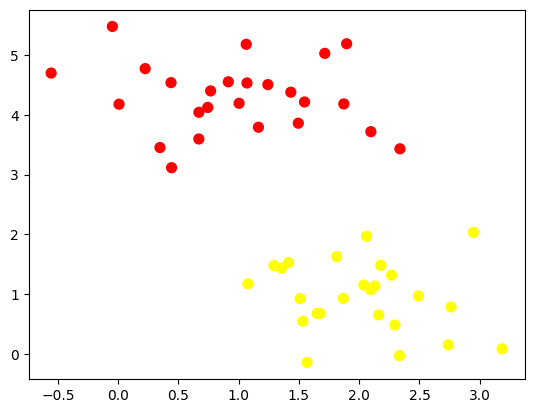

In [310]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples= 50, centers= 2, random_state= 0, cluster_std= 0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

* Buat garis pemisah

(-1.0, 3.5)

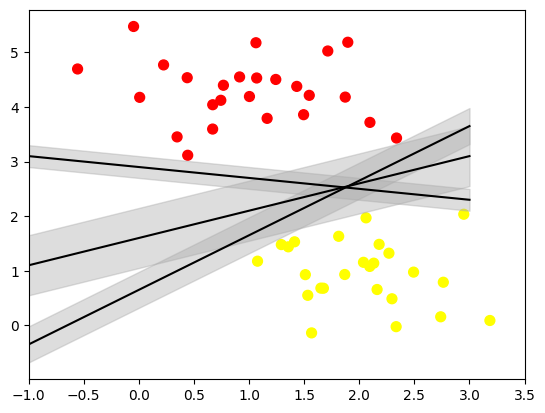

In [311]:
xfit = np.linspace(-1, 3, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

* Lakukan Fitting data 

In [312]:
from sklearn.svm import SVC
model = SVC(kernel= 'linear', C= 1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Buat Fungsi untuk visualisasi model

In [313]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

* Panggil fungsi untuk melakukan scatter plot

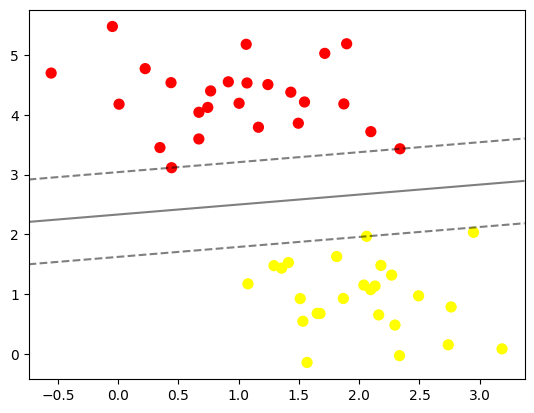

In [314]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

* Panggil `support vector` dalam model untuk mengetahui data apa saja yang masuk

In [315]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* Lakukan perbandingan data yang ada untuk mengetahui perbedaan model

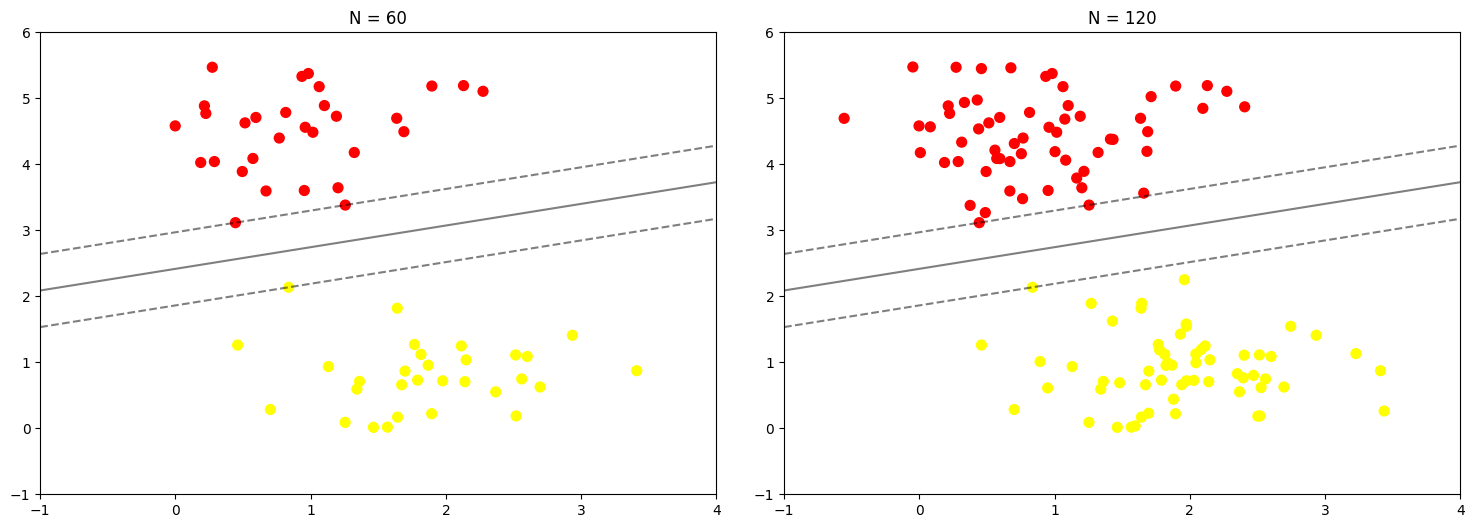

In [316]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* Gunakan `ipywidget` untuk data yang lebih jelas

In [317]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# ***Praktikum 2***

* Buat data baru menggunakan circle

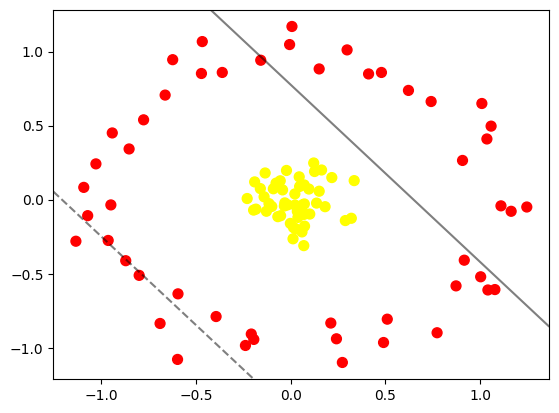

In [318]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor= .1, noise= .1)
clf = SVC(kernel='linear'). fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support= False)

* Lakukan pengubahan dataset menjadi 3D

In [319]:
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.27299626, -1.0997182 ],
       [-0.19600234, -0.07047262],
       [ 0.00664681,  1.16987275],
       [-0.02223505,  0.19736585],
       [-0.59777823, -1.07907618],
       [ 0.13662565, -0.02304412],
       [ 0.15047796,  0.88308881],
       [-0.23910273, -0.98481636],
       [-0.39418433, -0.78940234],
       [-0.03339094, -0.04272871],
       [-0.09171148,  0.07366609],
       [-0.46716357,  1.0678901 ],
       [-1.13491526, -0.28068696],
       [ 1.00380234, -0.52091805],
       [ 0.07125058,  0.09966009],
       [ 0.21730474,  0.14931306],
       [-0.13498733,  0.1802827 ],
       [ 0.07317383, -0.17882408],
       [ 0.10074311, -0.09716945],
       [ 0.16307195,  0.20049284],
       [-0.06794519, -0.11473714],
       [ 0.49056553, -0.96481688],
       [ 0.09612261,  0.07185153],
       [ 0.12609428,  0.19021793],
       [-0.05325743, -0.10828889],
       [-0.87154796, -0.41225309],
       [ 0.0471889 ,  0.08914426],
       [

* Lakukan Fitting model 

In [320]:
clf_n = SVC(kernel= 'rbf', C=1E6)
clf_n.fit(X, y)

,C,1000000.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Lakukan plotting

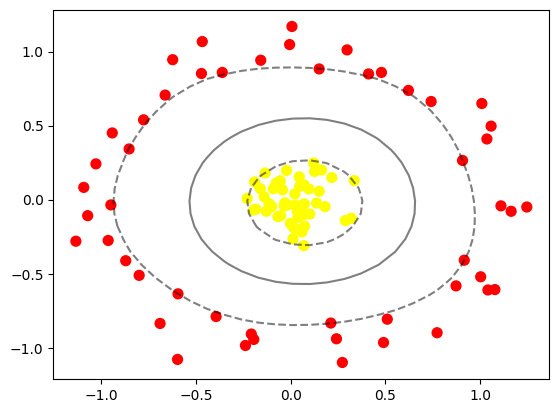

In [321]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf_n)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

# ***Praktikum 3***

* Buat data dummy baru

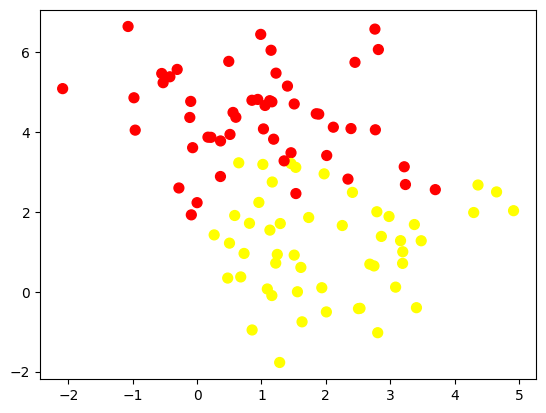

In [322]:
X, y = make_blobs(n_samples= 100, centers= 2, random_state= 0, cluster_std= 1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

* Lakukan penghalusan data menggunakan metode `SVC`

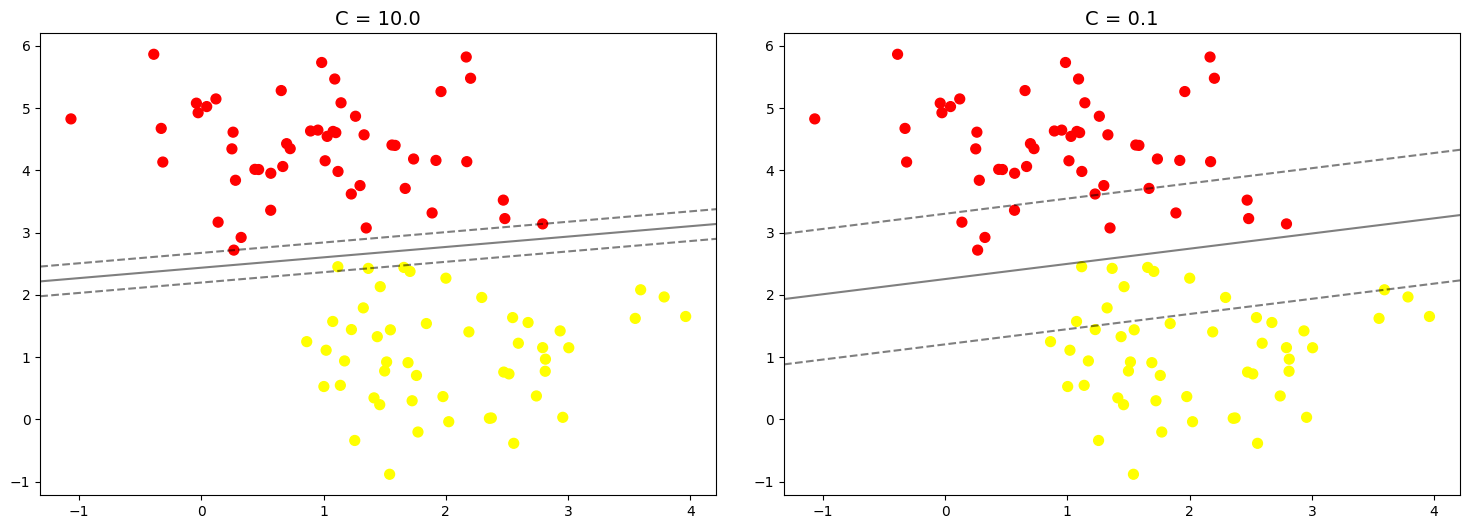

In [323]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# ***Praktikum 4***

* Lakukan import dataset wajah

In [324]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


* Lakukan inspeksi pada citra yang ada

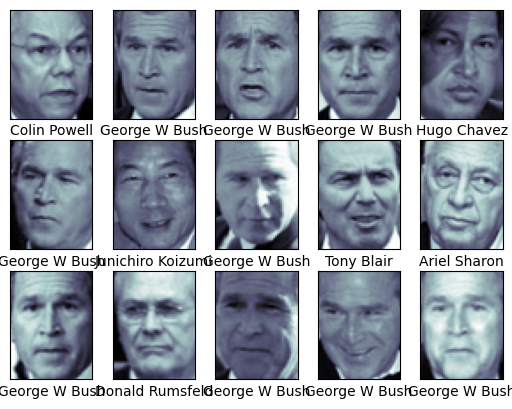

In [325]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* Lakukan Pre processed image dengan `PCA`

In [326]:
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

* Lakukan Split data

In [327]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(faces.data, faces.target, random_state= 42)

* Lakukan pembuatan model dan tune data

In [328]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(train_X, train_y)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 15.8 s
Wall time: 22.7 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


* Gunakan model untuk prediksi lebih akurat

In [329]:
model = grid.best_estimator_
yfit = model.predict(test_X)

* Cek prediksi model

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

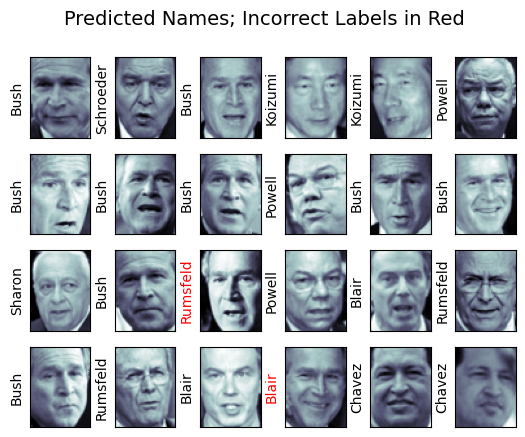

In [330]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(test_X[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == test_y[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

* Lakukan reportase keakuratan

In [331]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



* Ubah menjadi heatmap

Text(113.92222222222219, 0.5, 'predicted label')

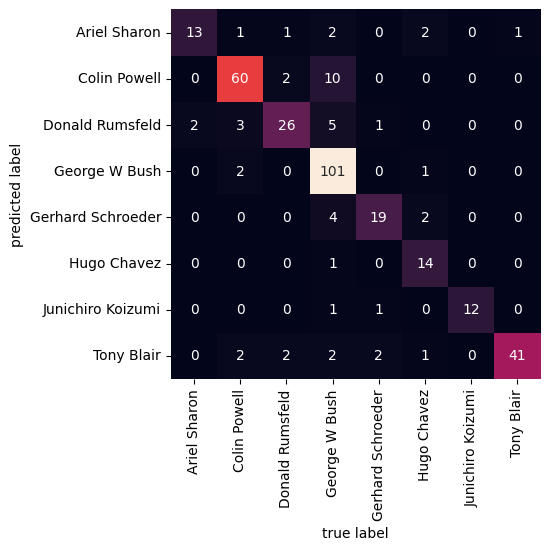

In [332]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# ***Praktikum 5***

* Lakukan import library yang dibutuhkan

In [333]:
import matplotlib.image as mpimg
from pathlib import Path
import cv2 as cv
import random

* Lakukan ekstrasi data

In [334]:
train_dir = "../data/images/training/"
test_dir = "../data/images/test/"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*') 
    img_list = []

    for dir in dirs:
        if not dir.is_dir(): 
            continue
        
        label = dir.name 
        
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label)) 
    
    return img_list

* Lakukan load data 

In [335]:
train_img = load_dataset(train_dir)

* Cek salah satu image 

In [336]:
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

* Lakukan pengecekan gambar secara acak

Image 68
(469, 640, 3)
Shape	: (458, 800, 3)
Label	: night


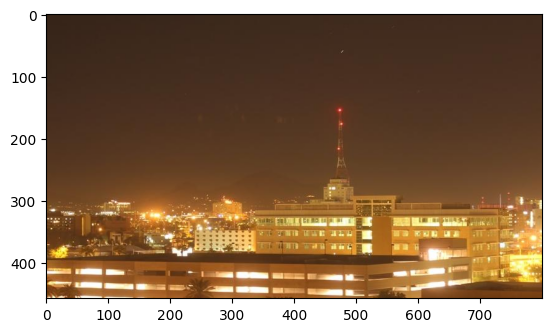

In [337]:
pick_rand = np.random.randint(0, len(train_img))
print(f'Image {pick_rand}')
print(train_img[pick_rand][0].shape)
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')
random_img_viz(train_img)

* Lakukan pembuatan fungsi preprocessing image

In [338]:
# Make sure you have 'import cv2 as cv' imported
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv.resize(image, (1100,600))
    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0 # Default to 0 (night)
    if(label == 'day'):
        num_val = 1
    
    return num_val

def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1] # This is a string: 'day' or 'night'

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label) # This converts string to int (1 or 0)

        std_img_list.append((std_img, img_label))
    
    return std_img_list


* Lakukan preprocessing image 

In [339]:
train_std_img_list = preprocess(train_img)

* Lakukan test image yang sudah di process

In [340]:
pick_rand = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_rand}')
print(train_std_img_list[pick_rand][0].shape)

Image 2
(600, 1100, 3)


* Lakukan cek kembali dengan fungsi `image viz`

Shape	: (600, 1100, 3)
Label	: 1


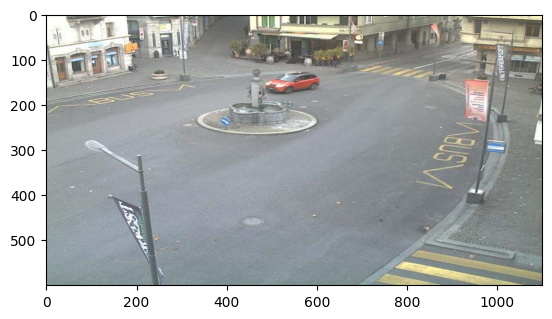

In [341]:
random_img_viz(train_std_img_list)

* Lakukan pembuatan fungsi `average brightness`

In [342]:
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

* Lakukan pengecekan random kembali

Image 31
Avg Brighness: 163.8033


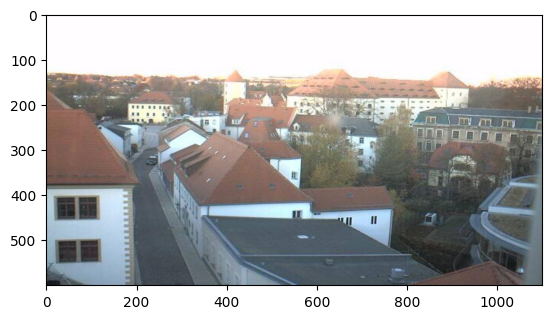

In [343]:
pick_rand = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[pick_rand][0]
avg_img = avg_brightness(feature_img)
print(f'Image {pick_rand}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

* Lakukan pembuatan fungsi Tresholding

In [344]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

* Lakukan pengecekan kembali

Image 175
Actual label: 0
Predicted label: 0


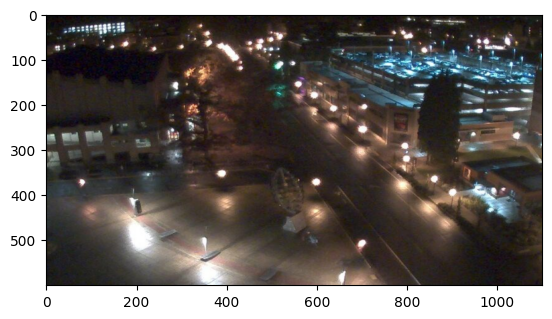

In [345]:
pick_rand = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[pick_rand][0], threshold=120)
print(f'Image {pick_rand}')
print(f'Actual label: {train_std_img_list[pick_rand][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[pick_rand][0])

* Buat Fungsi untuk Evaluasi manual

In [346]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

* Lakukan pemanggilan dengan treshold 120

In [347]:
evaluate(train_std_img_list, 120)

Accuracy: 0.8417


* Lakukan testing load image

In [348]:
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


* Buat fungsi untuk ekstrasi fitur

In [349]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

* Lakukan pemanggilan untuk train data image 

In [350]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.092992,1.0
1,192.907867,1.0
2,132.133823,1.0
3,199.749191,1.0
4,109.947203,1.0


* Lakukan pemanggilan untuk test image

In [351]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}') 
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.228062,1.0
1,157.826662,1.0
2,201.607444,1.0
3,191.237441,1.0
4,188.119652,1.0


* Buat model untuk SVM

In [352]:
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]
model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* Lakukan Evaluasi model

In [353]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# ***Tugas Praktikum***


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,
    * Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
    * Gunakan model dengan kernel linier.
    * Gunakan model dengan kernel polynomial.
    * Gunakan model dengan kernel RBF.
    * Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

In [354]:
df = pd.read_csv('../data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


* Lakukan preprocessing data

In [360]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
X = df.drop(['label'], axis=1)
y = df['label']

* Lakukan pembuatan model dan test

In [365]:
test_sizes = [0.3, 0.2] 
kernels = ['linear', 'poly', 'rbf']
results = []
for split_ratio in test_sizes:
    train_ratio = 1 - split_ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

for kernel_name in kernels:
    model = SVC(kernel=kernel_name, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "split_ratio" : train_ratio,
        "kernel" : kernel_name,
        "accuracy" : accuracy
        
    })
result = pd.DataFrame(results)
pivot_df = result.pivot(index='split_ratio', columns='kernel', values='accuracy')
pivot_df.index.name = 'Rasio (Train:Test)'
print(pivot_df.to_markdown(floatfmt=".4f"))


|   Rasio (Train:Test) |   linear |   poly |    rbf |
|---------------------:|---------:|-------:|-------:|
|               0.8000 |   0.9748 | 0.9558 | 0.9826 |


2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

* Buat Fungsi untuk ekstrasi fitur

In [369]:
def extract_histogram_features(img_list):
    features_list = []
    labels_list = []
    for i, (image_data, label_str) in enumerate(img_list):
        std_img = standarized_input(image_data)
    
        if std_img.dtype == 'float32' or std_img.dtype == 'float64':
            std_img = (std_img * 255).astype(np.uint8)
        if std_img.ndim == 3:
            gray_img = cv.cvtColor(std_img, cv.COLOR_RGB2GRAY)
        else:
            gray_img = std_img
            
        hist = cv.calcHist([gray_img], [0], None, [256], [0, 256])
        cv.normalize(hist, hist)
        features_list.append(hist.flatten())
        labels_list.append(label_encoder(label_str))
        if (i + 1) % 100 == 0:
            print(f"  ... memproses gambar ke-{i+1}/{len(img_list)}")
            
    col_names = [f'bin_{i}' for i in range(256)]
    X = pd.DataFrame(features_list, columns=col_names)
    y = pd.Series(labels_list, name='label')
    return X, y

* Lakukan ekstrasi fitur

In [372]:
train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)
all_data = train_data + test_data
X, y = extract_histogram_features(all_data)

  ... memproses gambar ke-100/400
  ... memproses gambar ke-200/400
  ... memproses gambar ke-300/400
  ... memproses gambar ke-400/400


* Lakukan standarasisasi fitur dan split data

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* lakukan pembuatan model dengan kernel `rbf`

In [374]:
model_base = SVC(kernel='rbf', random_state=42)
model_base.fit(X_train_scaled, y_train)
y_pred_base = model_base.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)
print(f"Akurasi Model RBF (Default): {acc_base * 100:.2f}%")

Akurasi Model RBF (Default): 98.75%


* Tentukan metric dan grid search

In [375]:
param_grid = {
        'C': [1, 10, 50],
        'gamma': ['scale', 'auto', 0.1, 0.01]
    }

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=3,n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


* Lakukan evaluasi model

In [376]:
y_pred_tuned = best_model.predict(X_test_scaled)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

* Buat Laporan performa nya

In [377]:
print("\n--- RINGKASAN PERFORMA ---")
print(f"Akurasi RBF Default: {acc_base * 100:.2f}%")
print(f"Akurasi RBF Tuned  : {acc_tuned * 100:.2f}%")
print("\nLaporan Klasifikasi Detail (Model Tuned):")
print(classification_report(y_test, y_pred_tuned, target_names=['night (0)', 'day (1)']))


--- RINGKASAN PERFORMA ---
Akurasi RBF Default: 98.75%
Akurasi RBF Tuned  : 98.75%

Laporan Klasifikasi Detail (Model Tuned):
              precision    recall  f1-score   support

   night (0)       1.00      0.97      0.99        40
     day (1)       0.98      1.00      0.99        40

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

